In [74]:
#Adding simple Plotly Graph
import pandas as pd
import json
import plotly
import plotly.express as px


#Adding import yfinance as 
import yfinance as yf



In [75]:

# Return the JSON data for the Plotly graph
def gm(stock,period, interval):
    st = yf.Ticker(stock)
  
    # Create a line graph
    df_stock = st.history(period=(period), interval=interval)
    df_stock=  df_stock.reset_index()
    df_stock.columns = ['Date-Time']+list(df_stock.columns[1:])
    max = (df_stock['Open'].max())
    min = (df_stock['Open'].min())
    range = max - min
    margin = range * 0.05
    max = max + margin
    min = min - margin
    fig_stock = px.area(df_stock, x='Date-Time', y="Open",
        hover_data=("Open","Close","Volume"), 
        range_y=(min,max), template="seaborn" )

    # Create a JSON representation of the graph
    graphJSON_stock = json.dumps(fig_stock, cls=plotly.utils.PlotlyJSONEncoder)
    return df_stock

In [76]:
#SAMPLE DATA!!!
# data=MSFT & period=1d & interval=1m

stock='MSFT'
period='5y'
interval='1d'
st = yf.Ticker(stock)
df_stock = st.history(period=(period), interval=interval)
df_stock=  df_stock.reset_index()
df_stock.columns = ['Date-Time']+list(df_stock.columns[1:])
max = (df_stock['Open'].max())
min = (df_stock['Open'].min())
range = max - min
margin = range * 0.05
max = max + margin
min = min - margin
fig_stock = px.line(df_stock, x='Date-Time', y="Open",hover_data=("Open","Close","Volume"), range_y=(min,max), template="seaborn" )

In [77]:
df_stock.head()
#df_stock.describe()

,Date-Time,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-04-17,60.713845,61.133910,60.685841,61.124580,16689300,0.0,0
1,2017-04-18,60.984562,61.339284,60.825872,61.040569,15155600,0.0,0
2,2017-04-19,61.283278,61.376625,60.573828,60.713852,26992800,0.0,0
3,2017-04-20,61.105913,61.376625,60.807198,61.143253,22299500,0.0,0
4,2017-04-21,61.301940,62.263428,61.096572,61.983387,32522600,0.0,0


In [78]:
import os
import requests

debugtoggle = True
# import alpaca_trade_api as tradeapi #####Commenting the deprecated way to call the API
from alpaca_trade_api.rest import REST, TimeFrame #Current way to import Alpaca API
from dotenv import load_dotenv 

# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
api_key=os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [79]:
# Format current date as ISO format
start_date = "2022-03-21"
end_date = "2022-03-21"

# Set the tickers
tickers = ["TSLA", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
api = REST(api_key , api_secret_key, api_version='v2')
stock_and_bond_prices = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
#stock_and_bond_prices.index = stock_and_bond_prices.index.date

# Preview DataFrame
if (debugtoggle):
    print(f'{stock_and_bond_prices.head()}')
    #print(f'here {stock_and_bond_prices[["close","symbol"]]}')

                             open    high     low   close    volume  \
timestamp                                                             
2022-03-21 04:00:00+00:00  444.45  446.46  440.68  444.30  85377983   
2022-03-21 04:00:00+00:00  915.05  942.85  907.09  921.16  27049677   

                           trade_count        vwap symbol  
timestamp                                                  
2022-03-21 04:00:00+00:00       912432  443.796432    SPY  
2022-03-21 04:00:00+00:00       736831  922.470994   TSLA  


In [80]:
# Pick AGG and SPY close prices
stock_and_bond_prices = stock_and_bond_prices[["close","symbol"]]
#rslt_df = dataframe[dataframe['Percentage'] > 80]
agg_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="TSLA"].iloc[0]["close"])
spy_close_price = float(stock_and_bond_prices[stock_and_bond_prices['symbol']=="SPY"].iloc[0]["close"])
# Print AGG and SPY close prices
print(f"Current TSLA closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current TSLA closing price: $921.16
Current SPY closing price: $444.3


In [81]:

# Set current amount of shares
my_agg = 200
my_spy = 50

my_spy = 50
my_agg = 200

# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} TSLA shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $22,215.00
The current value of your 200 TSLA shares is $184,232.00


In [82]:

df_stock.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.0
mean,164.891629,166.491850,163.171267,164.923720,2.930228e+07,0.007794,0.0
std,80.696890,81.491664,79.815878,80.697962,1.299302e+07,0.062024,0.0
min,60.713845,61.133910,60.573828,60.713852,7.425600e+06,0.000000,0.0
25%,97.688180,98.200928,96.551543,97.631819,2.117492e+07,0.000000,0.0
50%,136.629522,137.618161,135.222225,136.346893,2.607120e+07,0.000000,0.0
75%,223.989731,225.890449,221.299647,222.882015,3.352010e+07,0.000000,0.0
max,343.908878,348.948476,341.493913,342.402008,1.112421e+08,0.620000,0.0


In [83]:
df_stock.head()

,Date-Time,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-04-17,60.713845,61.133910,60.685841,61.124580,16689300,0.0,0
1,2017-04-18,60.984562,61.339284,60.825872,61.040569,15155600,0.0,0
2,2017-04-19,61.283278,61.376625,60.573828,60.713852,26992800,0.0,0
3,2017-04-20,61.105913,61.376625,60.807198,61.143253,22299500,0.0,0
4,2017-04-21,61.301940,62.263428,61.096572,61.983387,32522600,0.0,0


In [84]:
df_stock.index=df_stock.index.date
df_stock=df_stock[['close', 'symbol']]

AttributeError: 'RangeIndex' object has no attribute 'date'

In [ ]:
stock='U'
period='1y'
interval='1d'
st = yf.Ticker(stock)
df_stock = st.history(period=(period), interval=interval)
df_stock.loc[:,'Symbol'] = stock

In [ ]:
df_stock.head()

In [ ]:
type(st)


In [85]:
df_stock.loc[:,'Symbol'] = stock

In [86]:
df_stock.head()

,Date-Time,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
0,2017-04-17,60.713845,61.133910,60.685841,61.124580,16689300,0.0,0,MSFT
1,2017-04-18,60.984562,61.339284,60.825872,61.040569,15155600,0.0,0,MSFT
2,2017-04-19,61.283278,61.376625,60.573828,60.713852,26992800,0.0,0,MSFT
3,2017-04-20,61.105913,61.376625,60.807198,61.143253,22299500,0.0,0,MSFT
4,2017-04-21,61.301940,62.263428,61.096572,61.983387,32522600,0.0,0,MSFT


In [87]:
st.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [89]:
start_date = "2019-04-10"
end_date = "2022-04-10"
# Set the tickers
# tickers = "AAPL"
tickers = stock
timeframe = "1D"
api = REST(api_key, api_secret_key, api_version='v2')
df2 = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
df2.loc[:,'symbol'] = tickers
max = (df2['close'].max())
min = (df2['close'].min())
range = max - min
margin = range * 0.05
max = max + margin
min = min - margin
fig_stock = px.area(df2, x=df2.index, y="open", hover_data=("symbol","open","close","volume"), range_y=(min,max), template="seaborn" )
graphJSON = json.dumps(fig_stock, cls=plotly.utils.PlotlyJSONEncoder)

In [92]:
df2.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-04-10 04:00:00+00:00,119.75,120.35,119.54,120.19,16519313,111591,120.047306,MSFT
2019-04-11 04:00:00+00:00,120.50,120.85,119.92,120.33,14209236,112622,120.233174,MSFT
2019-04-12 04:00:00+00:00,120.71,120.98,120.37,120.95,19745198,124456,120.726632,MSFT
2019-04-15 04:00:00+00:00,121.00,121.58,120.57,121.05,15792742,112379,121.031810,MSFT
2019-04-16 04:00:00+00:00,121.55,121.65,120.10,120.77,14072387,111987,120.997512,MSFT


In [93]:
pivottable = pd.pivot_table(df2, values='close', index=df2.index, columns=['symbol'])
pivottable

symbol,MSFT
timestamp,
2019-04-10 04:00:00+00:00,120.19
2019-04-11 04:00:00+00:00,120.33
2019-04-12 04:00:00+00:00,120.95
2019-04-15 04:00:00+00:00,121.05
2019-04-16 04:00:00+00:00,120.77
...,...
2022-04-04 04:00:00+00:00,314.97
2022-04-05 04:00:00+00:00,310.88
2022-04-06 04:00:00+00:00,299.50


In [99]:
from MCForecastTools import MCSimulation
pivottable = pd.pivot_table(df2, values='close', index=df2.index, columns=['symbol'])
ticker_name = [(x,'close') for x in pivottable.columns]
micolumns = pd.MultiIndex.from_tuples(ticker_name)
pivottable.columns = micolumns
pivottable

,MSFT
,close
timestamp,
2019-04-10 04:00:00+00:00,120.19
2019-04-11 04:00:00+00:00,120.33
2019-04-12 04:00:00+00:00,120.95
2019-04-15 04:00:00+00:00,121.05
2019-04-16 04:00:00+00:00,120.77
...,...
2022-04-04 04:00:00+00:00,314.97
2022-04-05 04:00:00+00:00,310.88


In [104]:
MC_5years = MCSimulation(
    portfolio_data = pivottable,
    weights = [1],
    num_simulation = 100,
    num_trading_days = 252*30
)

In [105]:
MC_5years.portfolio_data.head()

MSFT             
                            close daily_return
timestamp                                     
2019-04-10 04:00:00+00:00  120.19          NaN
2019-04-11 04:00:00+00:00  120.33     0.001165
2019-04-12 04:00:00+00:00  120.95     0.005152
2019-04-15 04:00:00+00:00  121.05     0.000827
2019-04-16 04:00:00+00:00  120.77    -0.002313

In [106]:
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993254,1.044289,0.992284,0.995705,1.020870,1.022302,1.002070,1.002284,0.992958,1.010406,...,1.014201,1.004236,0.999503,1.028866,1.009470,1.019837,1.010075,0.993068,1.010116,0.977444
2,0.976552,1.029516,1.009343,1.010623,1.060837,1.032682,0.970368,1.011340,1.016039,1.003542,...,0.992236,1.006946,0.999320,1.008669,1.018065,1.041550,0.999741,1.015284,1.014872,1.018675
3,0.980596,1.022839,1.023124,0.983462,1.057971,1.011519,0.967415,1.003453,1.018607,1.049054,...,0.985603,1.038472,0.999642,1.007840,1.040672,1.046341,1.042681,1.010335,1.021537,1.012529
4,0.938528,1.047720,0.998301,0.929542,1.091719,1.041335,0.959297,0.991655,1.025899,1.072827,...,0.955950,1.059119,0.982325,0.989378,0.992737,1.038748,1.034463,1.011325,1.039248,0.994471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3514.331867,98875.787850,14543.016419,27839.427144,63500.799367,32749.059037,5273.377285,14141.693333,42454.482099,87.695164,...,26865.827724,1239.448770,5295.403252,133839.225342,12863.859921,8284.538330,18209.487079,14009.608260,477.935093,11583.362044
7557,3664.835575,100312.566043,14110.310087,27870.606379,64541.031993,32947.709247,5345.124601,13936.917967,42213.373638,88.336742,...,26961.167829,1243.446155,5186.080757,134795.996897,12972.596462,8269.688555,18212.627947,14309.828248,467.824030,11405.613591
7558,3564.443472,99695.280968,14297.879598,28469.201747,64298.604050,31930.986094,5231.073497,13985.338148,42394.160332,85.973979,...,27276.073461,1251.945894,5224.514495,135708.629321,12891.283231,8397.696234,18283.607561,14480.912295,466.165759,11329.747362
7559,3531.280569,101330.135654,14408.713334,28203.919438,66196.405634,32321.265299,5295.109958,13835.907617,43494.871180,86.493420,...,26711.102059,1266.583935,5293.045885,135276.510416,12814.868707,8386.143251,18362.540239,14518.375002,450.491736,11590.045511


In [114]:
MC_5years.portfolio_data.columns

MultiIndex([('MSFT',        'close'),
            ('MSFT', 'daily_return')],
           )

In [122]:
micolumns = ['close','daily_return']
MC_5years.portfolio_data.columns = micolumns
MC_5years.portfolio_data.head()

,close,daily_return
timestamp,,
2019-04-10 04:00:00+00:00,120.19,NaN
2019-04-11 04:00:00+00:00,120.33,0.001165
2019-04-12 04:00:00+00:00,120.95,0.005152
2019-04-15 04:00:00+00:00,121.05,0.000827
2019-04-16 04:00:00+00:00,120.77,-0.002313


In [120]:
MC_5years.portfolio_data.reset_index()

timestamp    MSFT             
                                close daily_return
0   2019-04-10 04:00:00+00:00  120.19          NaN
1   2019-04-11 04:00:00+00:00  120.33     0.001165
2   2019-04-12 04:00:00+00:00  120.95     0.005152
3   2019-04-15 04:00:00+00:00  121.05     0.000827
4   2019-04-16 04:00:00+00:00  120.77    -0.002313
..                        ...     ...          ...
752 2022-04-04 04:00:00+00:00  314.97     0.017937
753 2022-04-05 04:00:00+00:00  310.88    -0.012985
754 2022-04-06 04:00:00+00:00  299.50    -0.036606
755 2022-04-07 04:00:00+00:00  301.37     0.006244
756 2022-04-08 04:00:00+00:00  296.97    -0.014600

[757 rows x 3 columns]

In [121]:
MC_5years.portfolio_data

MSFT             
                            close daily_return
timestamp                                     
2019-04-10 04:00:00+00:00  120.19          NaN
2019-04-11 04:00:00+00:00  120.33     0.001165
2019-04-12 04:00:00+00:00  120.95     0.005152
2019-04-15 04:00:00+00:00  121.05     0.000827
2019-04-16 04:00:00+00:00  120.77    -0.002313
...                           ...          ...
2022-04-04 04:00:00+00:00  314.97     0.017937
2022-04-05 04:00:00+00:00  310.88    -0.012985
2022-04-06 04:00:00+00:00  299.50    -0.036606
2022-04-07 04:00:00+00:00  301.37     0.006244
2022-04-08 04:00:00+00:00  296.97    -0.014600

[757 rows x 2 columns]

In [128]:
start_date = "2019-04-10"
end_date = "2022-04-10"
# Set the tickers
# tickers = "AAPL"
stock1 = "BRK.B"
stock2 = "T"
stock3 = "VYM"
stock4 = "PG"
stock5 = "VNQ"

tickers = [stock1,stock2,stock3,stock4,stock5]
timeframe = "1D"
api = REST(api_key, api_secret_key, api_version='v2')
df2 = api.get_bars(tickers, TimeFrame.Day, start_date, end_date, adjustment='raw').df
#df2.loc[:,'symbol'] = tickers
pivottable = pd.pivot_table(df2, values='close', index=df2.index, columns=['symbol'])
ticker_name = [(x,'close') for x in pivottable.columns]
micolumns = pd.MultiIndex.from_tuples(ticker_name)
pivottable.columns = micolumns
pivottable.head()

,BRK.B,PG,T,VNQ,VYM
,close,close,close,close,close
timestamp,,,,,
2019-04-10 04:00:00+00:00,204.52,104.65,31.88,87.69,86.91
2019-04-11 04:00:00+00:00,206.67,104.75,32.20,87.63,87.02
2019-04-12 04:00:00+00:00,210.56,105.06,32.20,88.05,87.49
2019-04-15 04:00:00+00:00,209.74,105.73,32.02,87.60,87.45
2019-04-16 04:00:00+00:00,211.80,106.42,32.25,85.62,87.89


In [144]:
MC_5years = MCSimulation(portfolio_data = pivottable,
    weights = [0.2,0.2,0.2,0.2,0.2],
    num_simulation = 100,
    num_trading_days = 252*5
)




In [145]:
MC_5years.portfolio_data.head()

BRK.B                   PG                   T  \
                            close daily_return   close daily_return  close   
timestamp                                                                    
2019-04-10 04:00:00+00:00  204.52          NaN  104.65          NaN  31.88   
2019-04-11 04:00:00+00:00  206.67     0.010512  104.75     0.000956  32.20   
2019-04-12 04:00:00+00:00  210.56     0.018822  105.06     0.002959  32.20   
2019-04-15 04:00:00+00:00  209.74    -0.003894  105.73     0.006377  32.02   
2019-04-16 04:00:00+00:00  211.80     0.009822  106.42     0.006526  32.25   

                                          VNQ                 VYM               
                          daily_return  close daily_return  close daily_return  
timestamp                                                                       
2019-04-10 04:00:00+00:00          NaN  87.69          NaN  86.91          NaN  
2019-04-11 04:00:00+00:00     0.010038  87.63    -0.000684  87.02     0.001266  
2019-04-12 04:00:00+00:00     0.000000  88.05     0.004793  87.49     0.005401  
2019-04-15 04:00:00+00:00    -0.005590  87.60    -0.005111  87.45    -0.000457  
2019-04-16 04:00:00+00:00     0.007183  85.62    -0.022603  87.89     0.005031

In [147]:
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002153,1.000472,0.992698,0.980922,0.990015,1.006762,0.990440,1.008572,1.004285,0.986729,...,0.986328,0.996331,1.000085,1.007269,0.996758,0.998734,0.989017,0.996102,1.012812,1.001915
2,1.007229,1.001914,0.985445,0.972566,0.989073,1.007056,0.997822,1.009704,0.991725,0.995563,...,0.992882,0.987209,1.005821,1.009388,0.992883,1.001619,1.008542,1.003758,1.016508,1.001682
3,0.995626,1.001041,0.980287,0.980696,0.979260,1.010648,1.003250,1.005363,0.997021,1.002928,...,0.994946,0.984761,1.002834,0.999728,0.993715,1.000794,1.004250,1.005122,1.004795,1.008260
4,1.001371,1.011938,0.988002,0.988752,0.982259,1.001080,1.007651,1.009928,1.009643,0.994889,...,1.004701,0.981160,1.014129,1.000450,0.986813,0.989701,0.999120,0.987694,1.019698,1.014220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.496999,2.221027,1.327021,1.387055,1.728476,1.640529,2.204800,1.226968,1.818629,3.280548,...,2.043713,1.615715,2.414182,1.855252,1.914307,1.813597,2.547151,1.437350,1.733981,2.080748
1257,1.498240,2.197952,1.341915,1.382029,1.740777,1.645405,2.191126,1.217610,1.816732,3.296032,...,2.056940,1.609574,2.399601,1.854646,1.921113,1.803701,2.517815,1.412533,1.723797,2.075898
1258,1.512915,2.192333,1.338834,1.388485,1.739689,1.639469,2.229839,1.213790,1.812143,3.287437,...,2.051639,1.614138,2.414110,1.845140,1.906991,1.813457,2.534086,1.409905,1.710999,2.073381
1259,1.518433,2.200840,1.336791,1.405612,1.740443,1.634901,2.231254,1.217569,1.796451,3.302885,...,2.028443,1.610247,2.407723,1.837876,1.913837,1.804722,2.529284,1.424762,1.716266,2.045263


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

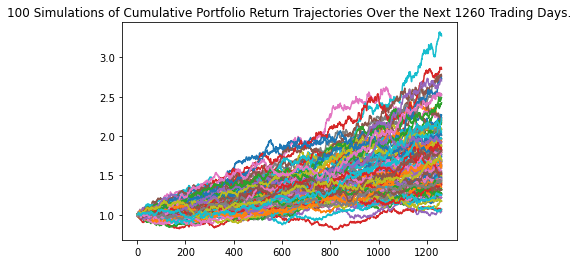

In [150]:
line_plot = MC_5years.plot_simulation()
line_plot

In [142]:
micolumns = [MC_5years.portfolio_data.columns[0][0]+'-close',MC_5years.portfolio_data.columns[0][0]+'-daily_return',
             MC_5years.portfolio_data.columns[1][0]+'-close',MC_5years.portfolio_data.columns[1][0]+'-daily_return',
             MC_5years.portfolio_data.columns[2][0]+'-close',MC_5years.portfolio_data.columns[2][0]+'-daily_return',
             MC_5years.portfolio_data.columns[3][0]+'-close',MC_5years.portfolio_data.columns[3][0]+'-daily_return',
             MC_5years.portfolio_data.columns[4][0]+'-close',MC_5years.portfolio_data.columns[4][0]+'-daily_return',
            ]

micolumns

['BRK.B-close',
 'BRK.B-daily_return',
 'BRK.B-close',
 'BRK.B-daily_return',
 'PG-close',
 'PG-daily_return',
 'PG-close',
 'PG-daily_return',
 'T-close',
 'T-daily_return']

In [143]:
MC_5years.portfolio_data.columns = micolumns
MC_5years.portfolio_data

,BRK.B-close,BRK.B-daily_return,BRK.B-close,BRK.B-daily_return,PG-close,PG-daily_return,PG-close,PG-daily_return,T-close,T-daily_return
timestamp,,,,,,,,,,
2019-04-10 04:00:00+00:00,204.52,NaN,104.65,NaN,31.88,NaN,87.69,NaN,86.91,NaN
2019-04-11 04:00:00+00:00,206.67,0.010512,104.75,0.000956,32.20,0.010038,87.63,-0.000684,87.02,0.001266
2019-04-12 04:00:00+00:00,210.56,0.018822,105.06,0.002959,32.20,0.000000,88.05,0.004793,87.49,0.005401
2019-04-15 04:00:00+00:00,209.74,-0.003894,105.73,0.006377,32.02,-0.005590,87.60,-0.005111,87.45,-0.000457
2019-04-16 04:00:00+00:00,211.80,0.009822,106.42,0.006526,32.25,0.007183,85.62,-0.022603,87.89,0.005031
...,...,...,...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,345.43,-0.018330,154.08,-0.006512,24.18,0.008340,109.94,-0.004888,112.58,-0.001331
2022-04-05 04:00:00+00:00,344.80,-0.001824,154.62,0.003505,23.89,-0.011993,109.40,-0.004912,111.92,-0.005862
2022-04-06 04:00:00+00:00,344.71,-0.000261,156.83,0.014293,24.03,0.005860,110.70,0.011883,112.22,0.002680


In [154]:
MC_5years.simulated_return.head()
MC_5years.nSim
MC_5years.nTrading

1260

In [155]:
plot_title = f"{MC_5years.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {MC_5years.nTrading} Trading Days."

In [156]:
MC_5years.simulated_return.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002153,1.000472,0.992698,0.980922,0.990015,1.006762,0.990440,1.008572,1.004285,0.986729,...,0.986328,0.996331,1.000085,1.007269,0.996758,0.998734,0.989017,0.996102,1.012812,1.001915
2,1.007229,1.001914,0.985445,0.972566,0.989073,1.007056,0.997822,1.009704,0.991725,0.995563,...,0.992882,0.987209,1.005821,1.009388,0.992883,1.001619,1.008542,1.003758,1.016508,1.001682
3,0.995626,1.001041,0.980287,0.980696,0.979260,1.010648,1.003250,1.005363,0.997021,1.002928,...,0.994946,0.984761,1.002834,0.999728,0.993715,1.000794,1.004250,1.005122,1.004795,1.008260
4,1.001371,1.011938,0.988002,0.988752,0.982259,1.001080,1.007651,1.009928,1.009643,0.994889,...,1.004701,0.981160,1.014129,1.000450,0.986813,0.989701,0.999120,0.987694,1.019698,1.014220


In [157]:
MC_5years.summarize_cumulative_return()

count           100.000000
mean              1.739863
std               0.437685
min               1.043726
25%               1.435248
50%               1.673557
75%               1.938627
max               3.274531
95% CI Lower      1.119816
95% CI Upper      2.750070
Name: 1260, dtype: float64

In [159]:

MC_5years.summarize_cumulative_return()
initial_investment = 1000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_5years.confidence_interval.iloc[0] * initial_investment, 2)
ci_upper = round(MC_5years.confidence_interval.iloc[1] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $1000 in the portfolio over the next 5 years will end within in the range of $1,119.82 and $2,750.07
